## Step 1: Describing the data and the source of the data 

## There are two datasets. One is training dataset named 'train_data' and another is testing dataset named 'test_data'. Training dataset is used to build various predictive models and the testing dataset is used to score it and generate an output file to submit on the Kaggle evaluation system.

## The source of the data is "https://www.kaggle.com/c/titanic/data". The data has been downloaded from that link, then was saved to local computer. Then it was imported to jupyter notebook using read_csv method of pandas library.

In [74]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
train_data = pd.read_csv("train.csv", sep=",")
test_data = pd.read_csv("test.csv", sep=",")

## Step 2: Initial exploration of the data  (printing data, visualizing data). Finding number of attributes, number of records in the data, whether there is any attribute which has missing data

## First 5 records in training dataset has been printed below.

In [75]:
print( train_data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## First 5 records in testing dataset has been printed below.

In [76]:
print( test_data.head(5))

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


## Number of rows and columns of training dataset has been printed below.

In [77]:
print(train_data.shape)

(891, 12)


## Number of rows and columns of testing dataset has been printed below.

In [78]:
print(test_data.shape)

(418, 11)


## Statistical properties of each data attribute in training dataset has been shown below.

In [79]:
print( train_data.describe()  )

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Statistical properties of each data attribute in testing dataset has been shown below.

In [80]:
print( test_data.describe()  )

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


## Plotting the number of passengers who survived and who did not survive from training dataset

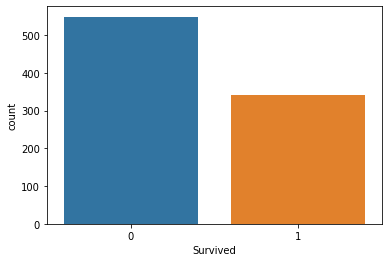

In [81]:
sns.countplot(x="Survived", data=train_data)

## Plotting number of passengers who survived and who did not survive based on geneder from training dataset

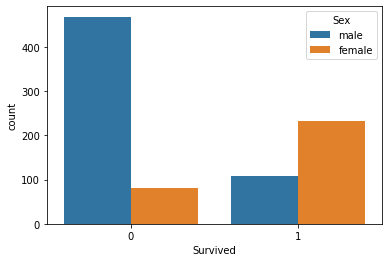

In [82]:
sns.countplot(x="Survived", hue="Sex",data=train_data)

##  Plotting number of passengers who survived and who did not survive based on passenger-class from training dataset

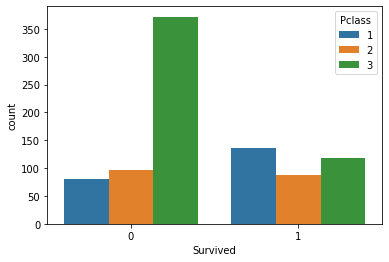

In [83]:
sns.countplot(x="Survived", hue="Pclass",data=train_data)

## Plotting histogram based on Age of the passengers from training dataset

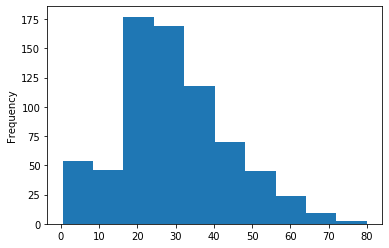

In [84]:
train_data["Age"].plot.hist()

## Plotting histogram based on Fare of the passengers from training dataset

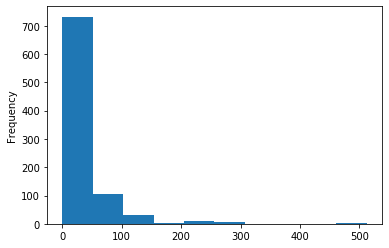

In [85]:
train_data["Fare"].plot.hist()

## Plotting histogram based on Sibsp of the passengers from training dataset

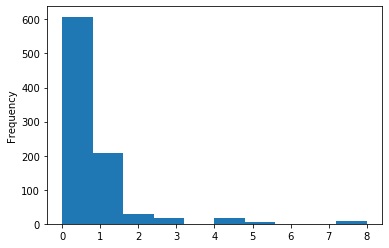

In [86]:
train_data["SibSp"].plot.hist()

## Showing how many null values each attribute of training dataset has

In [87]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Showing how many null values each attribute of testing dataset has

In [88]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Filling in missing age values with 0 from both training and testing dataset

In [89]:
train_data['Age'] = train_data['Age'].fillna(0)
test_data['Age'] = test_data['Age'].fillna(0)

## Converting the value of 'Sex' column ['male','female'] to [1,0] from both training and testing dataset

In [90]:
for df in [train_data, test_data]:
    df['Male']=df['Sex'].map({'male':1,'female':0})

## Converting the value of 'Embarked' column ['C', 'Q', 'S'] to [1,2,3] from both training and testing dataset

In [91]:
for df in [train_data, test_data]:
    df['Port']=df['Embarked'].map({'C':1,'Q': 2, 'S': 3})

##  Filling in missing 'Port' values with '3'  from both training and testing dataset because '3' has been most frequent

In [92]:
train_data['Port'] = train_data['Port'].fillna(3)
test_data['Port'] = test_data['Port'].fillna(3)

##  Filling in missing 'Fare' values with 0 from testing dataset

In [93]:
test_data['Fare'] = test_data['Fare'].fillna(0)

##  Dropping 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked' column from both trainig and testing dataset as they seem irrelevant to output

In [94]:
train_data = train_data.drop(['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'],axis=1)
test_data = test_data.drop(['Name','Ticket', 'Cabin','Sex', 'Embarked'],axis=1)

## Step 3: Finding correlation of data attributes and target variable (whether survived or not) to explore which attribute has most effects on output(target variable)


In [95]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
Age            0.010539
PassengerId   -0.005007
SibSp         -0.035322
Port          -0.167675
Pclass        -0.338481
Male          -0.543351
Name: Survived, dtype: float64

## Step 4: Computing any new attribute/feature from existing attributes [if necessary].

## No new attribute/feature has been added as it was not necessary

In [96]:
train_data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Port
0,1,0,3,22.0,1,0,7.2500,1,3.0
1,2,1,1,38.0,1,0,71.2833,0,1.0
2,3,1,3,26.0,0,0,7.9250,0,3.0
3,4,1,1,35.0,1,0,53.1000,0,3.0
4,5,0,3,35.0,0,0,8.0500,1,3.0


## Step 5: Selecting classification models

## Four classification model is used namely LogisticRegression, KNeighborsClassifier, SVC, RandomForestClassifier. These models are built below.

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

logRegModel = LogisticRegression()
randomForestModel = RandomForestClassifier(n_estimators=11)
svcModel = SVC()
kNeighbourModel = KNeighborsClassifier(n_neighbors = 11)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## Step 6: Performing cross validation of training data in all cases and run test data to decide which model is best

## By observing the cross-over matrix, 4 features has been chosen as they have higher relevance with output. Rest of features have been ignored as they have lower relevance with output. 

In [98]:
features = ['Male', 'Pclass', 'Fare', 'Port']
target = 'Survived'

## Cross over validation of these 4 models and printing their mean accuracy score are done below

In [99]:
logRegModel.fit(train_data[features], train_data[target])
score = cross_val_score(logRegModel, train_data[features], train_data[target], n_jobs=1, cv=k_fold, scoring='accuracy')
np.mean(score)

0.7743820224719102

In [127]:
randomForestModel.fit(train_data[features], train_data[target])
score = cross_val_score(randomForestModel, train_data[features], train_data[target], n_jobs=1, cv=k_fold, scoring='accuracy')
np.mean(score)

0.7890387016229713

In [101]:
svcModel.fit(train_data[features], train_data[target])
score = cross_val_score(svcModel, train_data[features], train_data[target], n_jobs=1, cv=k_fold, scoring='accuracy')
np.mean(score)

0.6722846441947565

In [102]:
kNeighbourModel.fit(train_data[features], train_data[target])
score = cross_val_score(kNeighbourModel, train_data[features], train_data[target], n_jobs=1, cv=k_fold, scoring='accuracy')
np.mean(score)

0.7395880149812734

## Among these 4 models, randomForestModel has shown higher accuracy in cross-over validation

## Step 7: Using Grid search to further fine tune the model and improving prediction performance

## Grid search has been used to improve the prediction performance of randomForestModel

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameter_grid = {
                 'n_estimators': [50, 10],
                 'bootstrap': [True, False],
                 'max_depth' : [4, 6, 8],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10]
                 }
randForestModel = RandomForestClassifier()
    
grid_search = GridSearchCV( randForestModel,
                            scoring='accuracy',
                            param_grid=parameter_grid,
                            cv=StratifiedKFold(n_splits=5)
                           )

grid_search.fit(train_data[features], train_data[target])

print(grid_search.best_score_)

0.8238089259933463


## Improved prediction performance has been shown after applying grid-search in randomForestModel

## Generating prediction data for testing dataset using grid_search in randomForestModel

In [104]:
predictions = grid_search.predict(test_data[features])
predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

## Generating a csv_file for submitting the prediction data in Kaggle

In [105]:
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived': predictions})

submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [106]:
filename = 'Survival_Predictions_Titanic.csv'

submission.to_csv(filename,index=False)

print(filename)

Survival_Predictions_Titanic.csv
